In [1]:
# !pip install pandas
# !pip install openpyxl

In [2]:
import pandas as pd
import glob

## 행정동단위 10개 관심집단수

1. 데이터프레임명 : interest_life_df
    - 23년 01월 ~ 23년 09월
    - 컬럼 17개 + 1개(월 추가)
        1. 행정동코드
        2. 자치구
        3. 행정동명
        4. 성별
        5. 연령대
        6. 총인구
        7. 1인가구수
        8. 커뮤니케이션이 적은 집단
        9. 평일 외출이 적은 집단
        10. 휴일 외출이 적은 집단
        11. 출근소요시간이 및 근무시간이 많은 집단
        12. 외출이 매우 적은 집단(전체)
        13. 외출이 매우 많은 집단
        14. 동영상서비스 이용이 많은 집단
        15. 생활서비스 이용이 많은 집단
        16. 재정상태에 대한 관심집단
        17. 외출-커뮤니케이션이 모두 적은 집단(전체)
        18. 월(month)
    - 레코드(Row) 91,584개(매달 10,176개)

### 데이터 읽어오기

In [5]:
file_list = glob.glob('../dedev_2nd_project/23_interest_lifedata/*.xlsx')
all_interest_life_df = []

for m, file_path in enumerate(file_list):
    df = pd.read_excel(file_path)
    if m + 1 >= 10:
        df['month'] = str(m+1)
    else:
        df['month'] = '0' + str(m+1)
    all_interest_life_df.append(df)

interest_life_df = pd.concat(all_interest_life_df, ignore_index=True)

In [6]:
interest_life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91584 entries, 0 to 91583
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   행정동코드                    91584 non-null  int64  
 1   자치구                      91584 non-null  object 
 2   행정동명                     91584 non-null  object 
 3   성별                       91584 non-null  int64  
 4   연령대                      91584 non-null  int64  
 5   총인구                      91584 non-null  float64
 6   1인가구수                    91584 non-null  float64
 7   커뮤니케이션이 적은 집단            91584 non-null  float64
 8   평일 외출이 적은 집단             91584 non-null  float64
 9   휴일 외출이 적은 집단             91584 non-null  float64
 10  출근소요시간 및 근무시간이 많은 집단     91584 non-null  float64
 11  외출이 매우 적은 집단(전체)         91584 non-null  float64
 12  외출이 매우 많은 집단             91584 non-null  float64
 13  동영상서비스 이용이 많은 집단         91584 non-null  float64
 14  생활서비스 이용이 많은 집단       

In [7]:
interest_life_df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,1,20,221.44,53.98,7.97,2.22,5.90,3.48,0.00,4.88,7.72,2.32,1.80,0.00,01
1,1101053,종로구,사직동,1,25,321.00,107.77,7.85,8.53,12.08,11.15,7.07,10.78,10.63,16.32,16.93,2.34,01
2,1101053,종로구,사직동,1,30,349.00,117.23,17.72,12.49,10.43,12.13,7.40,18.66,13.35,15.36,9.66,8.80,01
3,1101053,종로구,사직동,1,35,353.00,110.58,21.52,14.27,9.60,12.93,10.15,17.26,21.35,10.42,13.39,6.71,01
4,1101053,종로구,사직동,1,40,420.00,79.58,16.60,11.60,10.83,10.16,22.11,11.11,13.40,7.52,6.29,20.09,01


### 1.행정동코드 컬럼

- 필요여부 : 필요
- 데이터타입 : int
- 전처리 : 최신 법정동코드의 코드값으로 변경 및 구 기준으로 전처리

### 2.자치구 컬럼

- 필요여부 : 불필요
    - Why? 법정동코드 테이블과 조인하면 됨

In [8]:
unique_gu = interest_life_df['자치구'].unique()
print(unique_gu)
print('자치구 수 :', len(unique_gu))

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']
자치구 수 : 25


### 3.행정동명 컬럼

- 필요여부 : 불필요
    - Why? 2번과 동일 & 구 기준임
- 전처리 : 같은 자치구끼리 group by가 필요함

### 4. 성별 컬럼

- 필요여부 : 필요
- 데이터타입 : int
- 전처리 : 최신 법정동코드의 코드값으로 변경 및 구 기준으로 전처리
- Value
    - 1 : 남자(45,792개)
    - 2 : 여자(45,792개)

In [9]:
unique_gender = interest_life_df['성별'].unique()
print(unique_gender)

[1 2]


In [10]:
count_gender = interest_life_df['성별'].value_counts()
print(count_gender)

성별
1    45792
2    45792
Name: count, dtype: int64


### 5.연령대

- 필요여부 : 필요
- 데이터타입 : int
- Value
    - 20 ~ 75(5 단위 간격) / 20세 이상 / 75세 이상은 75 값에 포함
    - 각각 7,632개
- 유의사항 : 75세 이상 데이터 수가 다른 연령층에 비해 적음(pdf 참조)

In [11]:
unique_age = interest_life_df['연령대'].unique()
print(unique_age)
print(len(unique_age))

[20 25 30 35 40 45 50 55 60 65 70 75]
12


In [12]:
count_age = interest_life_df['연령대'].value_counts()
print(count_age)

연령대
20    7632
25    7632
30    7632
35    7632
40    7632
45    7632
50    7632
55    7632
60    7632
65    7632
70    7632
75    7632
Name: count, dtype: int64


### 6.총인구

- 필요여부 : 필요
- 데이터타입 : float
- 전처리 : ???
    - (의문) 어떤 계산식으로 구해진 것인지? 소수점으로 저장하는 것이 맞을지?
        => 반올림 혹은 버림해서 저장하는 것이 맞을 것 같음(float -> int)

In [13]:
interest_life_df['총인구'].describe()

count    91584.000000
mean       806.999854
std        424.540007
min         19.000000
25%        497.467500
50%        752.000000
75%       1039.320000
max       4862.000000
Name: 총인구, dtype: float64

### 7.1인가구수

- 필요여부 : 불필요???
- 데이터타입 : float
- 전처리 : ???
    - (의문) 총인구 수와 동일하게 사용한다면 정수값으로 사용해야 하지 않을까?

In [14]:
interest_life_df['1인가구수'].describe()

count    91584.000000
mean       153.618881
std        174.324887
min          5.460000
25%         66.120000
50%        107.705000
75%        176.795000
max       3410.970000
Name: 1인가구수, dtype: float64

### 8.커뮤니케이션이 적은 집단

- 필요여부 : ???
- 데이터타입 : float
- 전처리 :
- Value
    - 커뮤니케이션 지수가 하위 10%
    - 커뮤니케이션 지수 = 평균 통화대상자 수, 평균 통화량, SNS 사용횟수, 평균 문자대상자 수, 평균 문자량

In [15]:
interest_life_df['커뮤니케이션이 적은 집단'].describe()

count    91584.000000
mean        15.361911
std         17.476156
min          0.000000
25%          5.890000
50%         10.450000
75%         18.510000
max        339.870000
Name: 커뮤니케이션이 적은 집단, dtype: float64

### 9.평일 외출이 적은 집단

- 필요여부 : 필요?
    - 인구 유출이 적은 이유라기 보다는 외출이 적다는 것을 수치상 근거로 사용하면 되지 않을지?
- 데이터타입 : float
- 전처리 :
- Value
    - 평일 이동지수가 하위 10%
    - 평일 이동지수 = (평일기준)집 추정 위치 체류시간, 추정거주지 외부로의 외출건수 및 이동거리 기준

In [16]:
interest_life_df['평일 외출이 적은 집단'].describe()

count    91584.000000
mean        15.361900
std         21.459073
min          0.000000
25%          4.700000
50%          9.670000
75%         18.342500
max        512.250000
Name: 평일 외출이 적은 집단, dtype: float64

### 10.휴일 외출이 적은 집단

- 필요여부 : 필요?
    - 인구 유출이 적은 이유라기 보다는 외출이 적다는 것을 수치상 근거로 사용하면 되지 않을지?
- 데이터타입 : float
- 전처리 : 
- Value
    - 휴일 이동지수가 하위 10%
    - 휴일 이동지수 = (휴일기준)집 추정 위치 체류시간, 추정거주지 외부로의 외출건수 및 이동거리 기준

In [17]:
interest_life_df['휴일 외출이 적은 집단'].describe()

count    91584.000000
mean        15.361888
std         20.603835
min          0.000000
25%          5.020000
50%         10.260000
75%         18.480000
max        564.280000
Name: 휴일 외출이 적은 집단, dtype: float64

### 11.출근소요시간이 및 근무시간이 많은 집단

- 필요여부 : 필요
    - 출퇴근시간에 인구 유입/유출의 양과 연관
- 데이터타입 : float
- 전처리 : 
- Value
    - 기타 이동지수가 상위 10%
    - 기타 이동지수 = 추정 거주지와 추정 근무지 간 이동 소요시간 및 근무시간, 지하철 이용량 기준

In [19]:
interest_life_df['출근소요시간 및 근무시간이 많은 집단'].describe()

count    91584.000000
mean        15.361895
std         21.267719
min          0.000000
25%          5.340000
50%         10.080000
75%         18.090000
max        556.100000
Name: 출근소요시간 및 근무시간이 많은 집단, dtype: float64

### 12.외출이 매우 적은 집단(전체)

- 필요여부 : ???
- 데이터타입 : float
- 전처리 : 
- Value
        
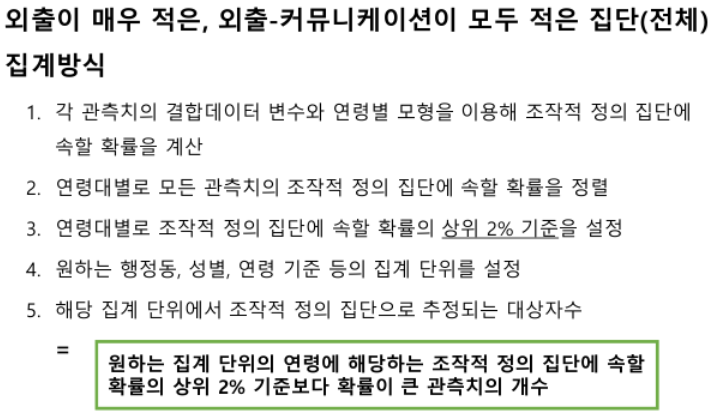

In [20]:
interest_life_df['외출이 매우 적은 집단(전체)'].describe()

count    91584.000000
mean        16.139982
std         12.805814
min          0.000000
25%          7.180000
50%         13.190000
75%         21.900000
max        269.140000
Name: 외출이 매우 적은 집단(전체), dtype: float64

### 13.외출이 매우 많은 집단

- 필요여부 : ???
- 데이터타입 : float
- 전처리 : 
- Value
    
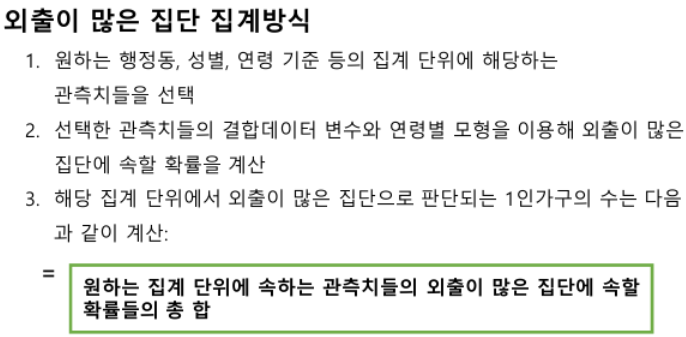

In [21]:
interest_life_df['외출이 매우 많은 집단'].describe()

count    91584.000000
mean        16.853961
std         19.355651
min          0.020000
25%          2.290000
50%         10.125000
75%         23.940000
max        210.920000
Name: 외출이 매우 많은 집단, dtype: float64

### 14.동영상서비스 이용이 많은 집단

- 필요여부 : 필요??불필요??
    -> 동영상 서비스 이용이 많으면 외부활동을 안해서?
    -> 어떻게 보면 이동하면서 볼지도...?
- 데이터타입 : float
- Value
    - 영상 서비스 소비지수 상위 10%
    - 영상 서비스 소비지수 = 방송/동영상 서비스 및 유튜브, 넷플릭스 이용량 기준

In [22]:
interest_life_df['동영상서비스 이용이 많은 집단'].describe()

count    91584.000000
mean        15.361896
std         19.505108
min          0.000000
25%          5.680000
50%         10.360000
75%         18.150000
max        479.870000
Name: 동영상서비스 이용이 많은 집단, dtype: float64

### 15.생활서비스 이용이 많은 집단

- 필요여부 : 불필요
    -> 금융/게임/쇼핑/배달 중 인구 유동과 관련된 것은 쇼핑밖에 없다고 생각됨
- 데이터타입 : float
- Value
    - 생활서비스 서비스 소비지수 상위 10%
    - 생활서비스 서비스 소비지수 = 금융/게임/쇼핑/배달 서비스 사용량 기준

In [23]:
interest_life_df['생활서비스 이용이 많은 집단'].describe()

count    91584.000000
mean        15.361895
std         21.136190
min          0.000000
25%          4.970000
50%          9.690000
75%         17.950000
max        415.620000
Name: 생활서비스 이용이 많은 집단, dtype: float64

### 16.재정상태에 대한 관심집단

- 필요여부 : 불필요???
    -> 휴대폰 결제 내역으로 재정 상태에 관심을 가진다고 보기 어려울 것 같음?
    -> 온라인 쇼핑몰 결제 내역이 포함되었다면 의미가 있을 수도?
- 데이터타입 : float
- 전처리 : 
- Value
    - 재정상태지수 10% 이상
    - 재정상태지수 = 휴대폰 소액결제 사용금액, 휴대폰 요금 연체 여부 기준

In [24]:
interest_life_df['재정상태에 대한 관심집단'].describe()

count    91584.000000
mean        15.361882
std         20.930677
min          0.000000
25%          4.950000
50%          9.820000
75%         18.170000
max        419.330000
Name: 재정상태에 대한 관심집단, dtype: float64

### 17.외출-커뮤니케이션이 모두 적은 집단(전체)

- 필요여부 : ???
- 데이터타입 : float
- Value : 12번과 동일

In [25]:
interest_life_df['외출-커뮤니케이션이 모두 적은 집단(전체)'].describe()

count    91584.000000
mean        16.140016
std         12.875450
min          0.000000
25%          6.740000
50%         13.310000
75%         22.400000
max        212.140000
Name: 외출-커뮤니케이션이 모두 적은 집단(전체), dtype: float64